In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline 

In [2]:
#for i in range(len(prices)):
    #prices[i] = prices[i].replace(',', '')
    #prices[i] = prices[i].strip('$')
    #prices[i] = float(prices[i])
   

## Calendar Data 

In [3]:
time_data = pd.read_csv('data/calendar.csv', delimiter=',')
time_data.drop(columns=['maximum_nights'], inplace=True)
time_data.drop(columns=['minimum_nights'], inplace=True)
time_data

/anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adjusted_price,available,date,listing_id,price
0,NaN,f,2019-05-27,3781,NaN
1,NaN,t,2019-09-13,50032,$700.00
2,NaN,t,2019-09-12,50032,$700.00
3,NaN,t,2019-09-11,50032,$700.00
4,NaN,t,2019-09-10,50032,$700.00
5,NaN,t,2019-09-09,50032,$700.00
6,NaN,t,2019-09-08,50032,$700.00
7,NaN,t,2019-09-07,50032,$700.00
8,NaN,t,2019-09-06,50032,$700.00
9,NaN,t,2019-09-05,50032,$700.00


In [4]:
# Regex the price and generate log(price)
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [5]:
time_data = time_data[np.isfinite(time_data['price'])]
#time_data.dropna(thresh=4)
time_data.drop(columns=['available'], inplace=True)

/anaconda2/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
time_data.size

62822905

In [7]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [8]:
#Still left with a reasonable amount of observations
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values


In [9]:
# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

In [10]:
# log_means = grouped['log_price'].mean().values
# plt.hist(means, bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of mean price by listing_id")
# plt.show()

# plt.hist(time_data['price'], bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of mean price by listing_id")
# plt.show()

# plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
# plt.title("distribution of the mean of log(price) by listing_id")
# plt.show()

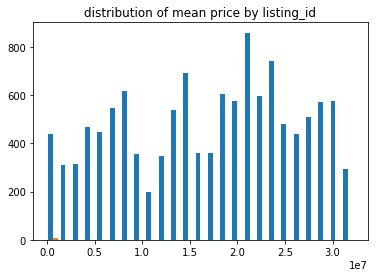

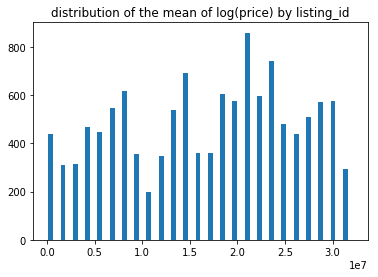

In [11]:

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values
plt.hist(means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of mean price by listing_id")
plt.show()

plt.hist(log_means, bins='auto')  # arguments are passed to np.histogram
plt.title("distribution of the mean of log(price) by listing_id")
plt.show()

In [12]:
#Goals: 
# 1)Get the average price for each specific listing [done]
# 2)Compute the distance between each day's price and the average price [done]
# 3)Visualize spikes [done]
# 4)For each day, check the change in price [done]

In [13]:
# Find high demand dates by checking for positive distance between a listings average price and it's current price.
# For these purposes, high demand is categorized as a date which experienced, on average, properties being 
# priced above their average list price

In [14]:
print ("number of unique properties:", len(nan_adjusted['listing_id'].unique()))

number of unique properties: 12262


In [15]:
# Let's sort to make things easier on pattern matching algorithm
#df.sort_values(by='col1', ascending=False)
#nan_adjusted.sort_values(by=['listing_id'], inplace=True)
#time_data.sort_values(by=['listing_id'], inplace=True)

In [16]:
mean_df = grouped.mean()
#mean_df['listing_id']

In [17]:
# Maybe I need to reset the index, who the hell knows if I'll use this later
#nan_adjusted.reset_index(inplace=True)


In [18]:
time_data['price_diff'] = 0
time_data.head()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,adjusted_price,date,listing_id,price,log_price,price_diff
1,NaN,2019-09-13,50032,700.0,6.55108,0
2,NaN,2019-09-12,50032,700.0,6.55108,0
3,NaN,2019-09-11,50032,700.0,6.55108,0
4,NaN,2019-09-10,50032,700.0,6.55108,0
5,NaN,2019-09-09,50032,700.0,6.55108,0


In [19]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0


In [20]:
nan_adjusted['listing_id'].count()/1000

12564.581

In [21]:
i=729
nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
print(nan_adjusted.iloc[i]['price_diff']) 



0


/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# for i in range(0,729):
#     nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
    
    

In [23]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]
mean_df_new

,listing_id,price
0,3353,43.536842
1,3781,135.652268
2,5453,150.000000
3,5506,145.820660
4,6695,173.765442
5,6976,64.148776
6,8789,111.509797
7,8792,147.348348
8,8865,93.337187
9,9273,225.000000


In [24]:
# Left-Merge
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')
new

,adjusted_price,date,listing_id,price_x,log_price,price_diff,price_y
0,NaN,2019-09-13,50032,700.0,6.551080,0,704.284124
1,NaN,2019-09-12,50032,700.0,6.551080,0,704.284124
2,NaN,2019-09-11,50032,700.0,6.551080,0,704.284124
3,NaN,2019-09-10,50032,700.0,6.551080,0,704.284124
4,NaN,2019-09-09,50032,700.0,6.551080,0,704.284124
5,NaN,2019-09-08,50032,700.0,6.551080,0,704.284124
6,NaN,2019-09-07,50032,700.0,6.551080,0,704.284124
7,NaN,2019-09-06,50032,700.0,6.551080,0,704.284124
8,NaN,2019-09-05,50032,700.0,6.551080,0,704.284124
9,NaN,2019-09-04,50032,700.0,6.551080,0,704.284124


In [25]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']
new

,adjusted_price,date,listing_id,price_x,log_price,price_diff,price_y
0,NaN,2019-09-13,50032,700.0,6.551080,-4.284124,704.284124
1,NaN,2019-09-12,50032,700.0,6.551080,-4.284124,704.284124
2,NaN,2019-09-11,50032,700.0,6.551080,-4.284124,704.284124
3,NaN,2019-09-10,50032,700.0,6.551080,-4.284124,704.284124
4,NaN,2019-09-09,50032,700.0,6.551080,-4.284124,704.284124
5,NaN,2019-09-08,50032,700.0,6.551080,-4.284124,704.284124
6,NaN,2019-09-07,50032,700.0,6.551080,-4.284124,704.284124
7,NaN,2019-09-06,50032,700.0,6.551080,-4.284124,704.284124
8,NaN,2019-09-05,50032,700.0,6.551080,-4.284124,704.284124
9,NaN,2019-09-04,50032,700.0,6.551080,-4.284124,704.284124


In [26]:
# Convert dates to datetime
final = new.groupby(['date'], as_index = False)

dates = pd.to_datetime(new['date'].values)


In [27]:
# Add new datetime object
new['datetime'] = dates


In [28]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()
final_sums['price_x'] = new['price_x']
final_sums['price_y'] = new['price_x']

final_sums

,datetime,price_diff,price_x,price_y
0,2015-10-02,7.371864,700.0,700.0
1,2015-10-03,16.953006,700.0,700.0
2,2015-10-04,3.833924,700.0,700.0
3,2015-10-05,-0.415049,700.0,700.0
4,2015-10-06,0.293709,700.0,700.0
5,2015-10-07,1.433710,700.0,700.0
6,2015-10-08,3.003532,700.0,700.0
7,2015-10-09,16.448026,700.0,700.0
8,2015-10-10,16.925621,700.0,700.0
9,2015-10-11,5.378745,700.0,700.0


/anaconda2/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Days When List Price Exceeded Average List Price for Individual AirBnbs')

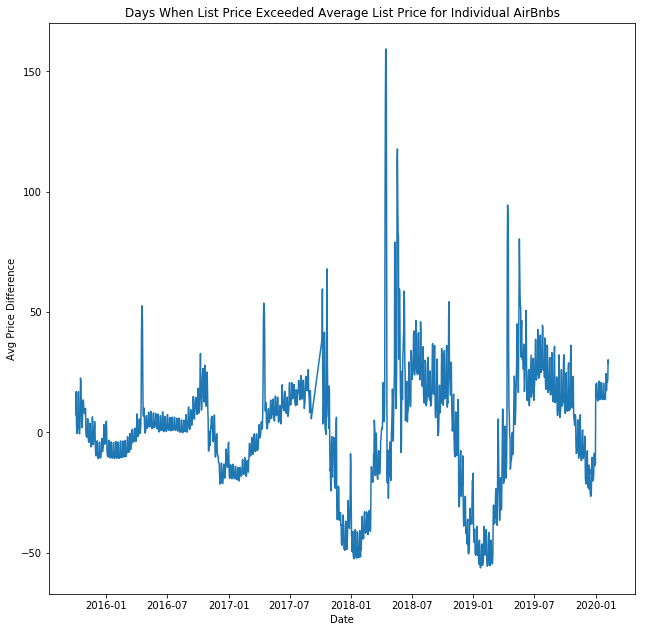

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Examine overall price difference trend
final_sums['month_year'] = final_sums['datetime'].dt.to_period('12M')
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)

ax.plot(final_sums['datetime'],final_sums['price_diff'])
# ax.set_xticklabels(final_sums['month_year'] )
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')


In [30]:
# Subset the data for easier viewing 
final_sums['month_year'] = final_sums['datetime'].dt.to_period('12M')

fall = final_sums[((final_sums['month_year'] >= '2018-09') & (final_sums['month_year'] <= '2018-12'))] 
winter = final_sums[((final_sums['month_year'] >= '2018-12') | (final_sums['month_year'] <= '2018-03') & (final_sums['month_year'] >='2018-01') & (final_sums['month_year'] <='2019-01'))] 
spring = final_sums[((final_sums['month_year'] >= '2018-03') & (final_sums['month_year'] <= '2018-06'))] 
summer = final_sums[((final_sums['month_year'] >= '2018-06') & (final_sums['month_year'] <= '2018-09'))] 

In [31]:
(fall.shape)

(122, 5)

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<PeriodArray>
['2018-09', '2018-10', '2018-11', '2018-12']
Length: 4, dtype: period[12M]

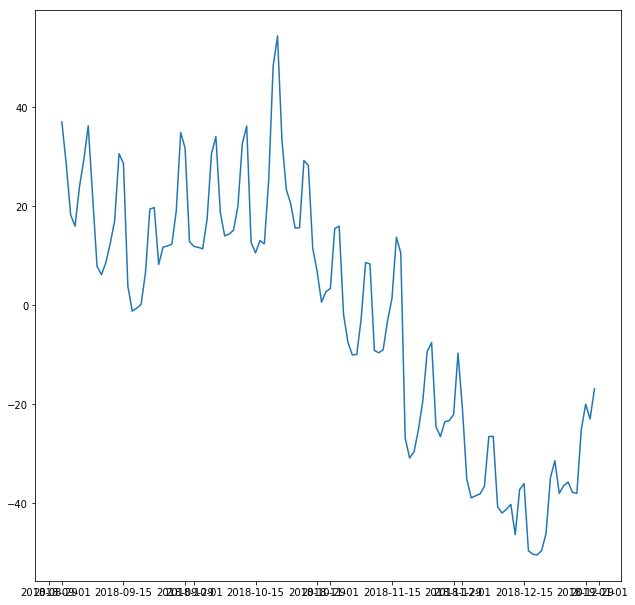

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fall['month_year'] = fall['datetime'].dt.to_period('12M')

ax.plot(fall['datetime'],fall['price_diff'])
#ax.set_xticklabels(fall['datetime'].dt.to_period('2M'))

fall['month_year'].unique()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


<PeriodArray>
['2018-01', '2018-02', '2018-03', '2018-12', '2019-01', '2019-02', '2019-03',
 '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10',
 '2019-11', '2019-12', '2020-01', '2020-02']
Length: 18, dtype: period[12M]

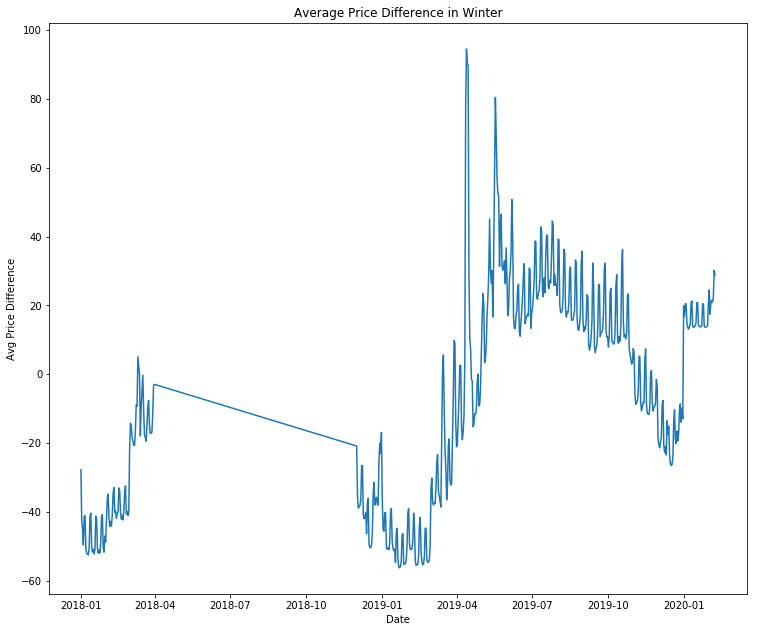

In [33]:
# WINTER 
# fig, ax = plt.subplots()
# fig.set_size_inches(12.5, 10.5, forward=True)
# fall['month_year'] = fall['datetime'].dt.to_period('12M')

# ax.plot(fall['datetime'],fall['price_diff'])
# ax.set_xticklabels(fall['month_year'])

# fall['month_year'].unique()

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)
winter['month_year'] = winter['datetime'].dt.to_period('12M')


ax.plot(winter['datetime'],winter['price_diff'])

# ax.set_xticklabels(winter['month_year'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')
winter['month_year'].unique()

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<PeriodArray>
['2018-06', '2018-07', '2018-08', '2018-09']
Length: 4, dtype: period[12M]

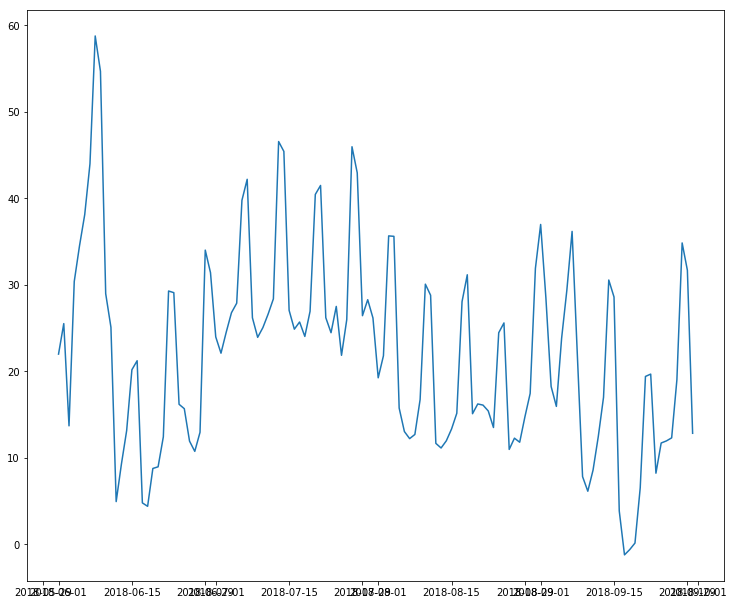

In [34]:
# SUMMER 
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)
summer['month_year'] = summer['datetime'].dt.to_period('12M')

ax.plot(summer['datetime'],summer['price_diff'])
# ax.set_xticklabels(summer['month_year'])

summer['month_year'].unique()


# fig, ax = plt.subplots()
# ax.plot(summer['datetime'],summer['price_diff'])
# ax.set_xticklabels(summer['datetime'])
# ax.set_xlabel('Date')
# ax.set_ylabel('Avg Price Difference')
# ax.set_title('Average Price Difference in Summer')

<PeriodArray>
['2018-09', '2018-10', '2018-11', '2018-12']
Length: 4, dtype: period[12M]

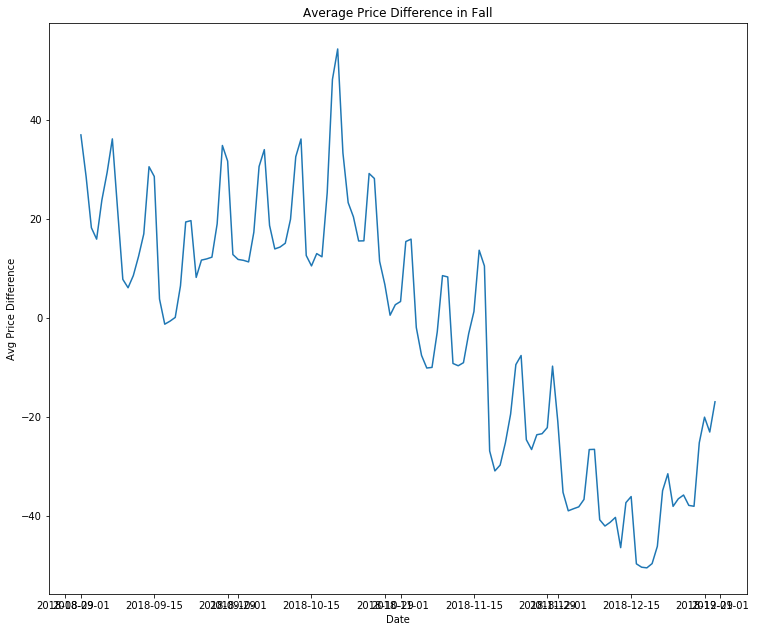

In [35]:
#FALL

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)

ax.plot(fall['datetime'],fall['price_diff'])
# ax.set_xticklabels(fall['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')
fall['month_year'].unique()


<PeriodArray>
['2018-03', '2018-04', '2018-05', '2018-06']
Length: 4, dtype: period[12M]

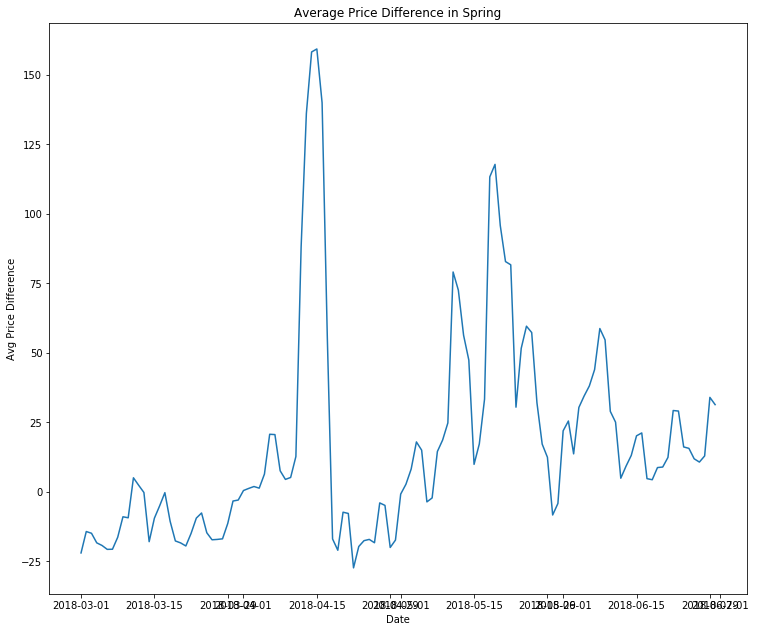

In [36]:
# SPRING

fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5, forward=True)

ax.plot(spring['datetime'],spring['price_diff'])
# ax.set_xticklabels(spring['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')
spring['month_year'].unique()


In [37]:
data=final_sums
data

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,700.0,700.0,2015-10
1,2015-10-03,16.953006,700.0,700.0,2015-10
2,2015-10-04,3.833924,700.0,700.0,2015-10
3,2015-10-05,-0.415049,700.0,700.0,2015-10
4,2015-10-06,0.293709,700.0,700.0,2015-10
5,2015-10-07,1.433710,700.0,700.0,2015-10
6,2015-10-08,3.003532,700.0,700.0,2015-10
7,2015-10-09,16.448026,700.0,700.0,2015-10
8,2015-10-10,16.925621,700.0,700.0,2015-10
9,2015-10-11,5.378745,700.0,700.0,2015-10


## KNN regression method

In [38]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [39]:
final_sums.dtypes

datetime      datetime64[ns]
price_diff           float64
price_x              float64
price_y              float64
month_year       period[12M]
dtype: object

In [40]:
y = final_sums['price_diff']


In [41]:
final_sums.head()
X=final_sums
final_sums.head()

,datetime,price_diff,price_x,price_y,month_year
0,2015-10-02,7.371864,700.0,700.0,2015-10
1,2015-10-03,16.953006,700.0,700.0,2015-10
2,2015-10-04,3.833924,700.0,700.0,2015-10
3,2015-10-05,-0.415049,700.0,700.0,2015-10
4,2015-10-06,0.293709,700.0,700.0,2015-10


In [42]:
# y = final_sums['price_diff']
# X = final_sums.drop(columns=['price_diff'], inplace=True)
# X = final_sums.drop(columns=['month_year'], inplace=True)
# X = final_sums.drop(columns=['price_x'], inplace=True)
X=final_sums


In [43]:
#Separating year and week
X['dateNumber']=0
X['year']=0
for i in range (1560):
    ts = pd.Timestamp(X['datetime'][i])
    X['dateNumber'][i]=ts.dayofyear
    X['year'][i]=ts.year
    
# ts=[]
# ts = pd.Timestamp(X['datetime'])
# str=ts.dayofyear
X=X.drop(columns=['datetime'], inplace=True)


/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [44]:
X=data
X.head()

,price_diff,price_x,price_y,month_year,dateNumber,year
0,7.371864,700.0,700.0,2015-10,275,2015
1,16.953006,700.0,700.0,2015-10,276,2015
2,3.833924,700.0,700.0,2015-10,277,2015
3,-0.415049,700.0,700.0,2015-10,278,2015
4,0.293709,700.0,700.0,2015-10,279,2015


In [45]:

# df_unix_sec = pd.to_datetime(df['time']).astype(int)/ 10**9
# print(df.dtypes)
data.head()

,price_diff,price_x,price_y,month_year,dateNumber,year
0,7.371864,700.0,700.0,2015-10,275,2015
1,16.953006,700.0,700.0,2015-10,276,2015
2,3.833924,700.0,700.0,2015-10,277,2015
3,-0.415049,700.0,700.0,2015-10,278,2015
4,0.293709,700.0,700.0,2015-10,279,2015


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)  

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler

rmse_val=[]

for k in range(20):
    k = k+1
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test)
    regressor = KNeighborsRegressor(n_neighbors = k) 
    regressor.fit(X_train, y_train)
    pred_test = regressor.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred_test))
    rmse_val.append(error) 
#     print('RMSE value for k= ' , k , 'is:', error)
    mape_train = np.mean(np.abs((y_train - y_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - pred_test) / y_test)) * 100
    #print('Mape_train value for k= ' , k , 'is:', mape_train)
    print('k= ' , k ,'Mape_test :', mape_test,'RMSE:', error )
    

TypeError: float() argument must be a string or a number, not 'Period'

## Random Forest Regres

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
def random_forest(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)  
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return mape_train, y_pred_test, mape_test, mse_test, rmse_test, model
def modelling(model, X_train, X_test, y_train, y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)  
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return [mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test]    

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()  
print(regressor)
mape_train, y_pred_test, mape_test, mse_test, rmse_test, model = random_forest(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', mape_train,'\nMAPE for test is: ', mape_test,'\nMSE for test is: ', mse_test, '\nRMSE for test is: ', rmse_test)



In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
X_feat = data.values
Y_feat = y.values
print(kf) 


In [ ]:

for n in range(2,8):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    X_feat = data.values
    Y_feat = y.values

    max_depth_list = [1,3,4,5,6,7,8,10,11,20]
    for depth in max_depth_list:
        MAPE_TEST = []  
        MAPE_TRAIN =[]
        regressor = RandomForestRegressor(n_estimators=10, max_depth= depth, criterion="mae") 

        for i, j in kf.split(data):
            X_train, X_test = X_feat[i], X_feat[j]
            y_train, y_test = Y_feat[i], Y_feat[j]
            mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
            MAPE_TEST.append(mape_test)
            MAPE_TRAIN.append(mape_train)
            if(mape_test<80 and mae_test<25):
                print("KF = ",n," Depth = ",depth,"MAPE = ",int(mape_test),"\t MAE = ",int(mae_test),"\t RMSE = ",int (rmse_test))
    #         if(mae_test<15):
    #             print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)

    #print("depth = ",depth, MAPE_TEST)

In [ ]:
kf = KFold(n_splits=7)
kf.get_n_splits(X)
X_feat = data.values
Y_feat = y.values

max_depth_list = [1,6]
for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(n_estimators=10, max_depth= depth, criterion="mae") 

    for i, j in kf.split(data):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
        MAPE_TEST.append(mape_test)
        MAPE_TRAIN.append(mape_train)
        if(mape_test<150 and mae_test<25):
            print("KF = ",n," Depth = ",depth,"MAPE = ",int(mape_test),"\t MAE = ",int(mae_test),"\t RMSE = ",int (rmse_test))
    #         if(mae_test<15):
    #             print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)

    #print("depth = ",depth, MAPE_TEST)

Result:
KF =  7  Depth =  6 MAPE =  70 	 MAE =  13 	 RMSE =  17
KF =  7  Depth =  1 MAPE =  76 	 MAE =  6 	 RMSE =  9


In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 

n_estimator_list = [10,15,20,25,30,50,60]
for est in n_estimator_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    mat=[]
    regressor = RandomForestRegressor(max_depth= 20,n_estimators = est) 

    for i, j in kf.split(X_feat):
        X_train, X_test = X_feat[i], X_feat[j]
        y_train, y_test = Y_feat[i], Y_feat[j]
        result = modelling(regressor,X_train, X_test, y_train, y_test)
    MAPE_TEST.append(result[1])
    MAPE_TRAIN.append(result[0])
    
    print("estimator = ",est, MAPE_TEST)
    

## Grid-search for Random Forest Regressor to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
regressor = RandomForestRegressor() 
param_grid = {"n_estimators": [20,25,30,40,200],
              "criterion":['mse','mae'],
              "max_features": ['auto', 'sqrt', 'log2'],
             "max_depth": [1,5,10,15]}

grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

print(grid_search.score)

In [ ]:
grid_search.best_params_


In [ ]:
grid_search.score

In [ ]:


for n in range(2,8):
    kf = KFold(n_splits=n)
    kf.get_n_splits(X)
    X_feat = data.values
    Y_feat = y.values

    max_depth_list = [1,3,4,5,6,7,8,10,11,20]
    for depth in max_depth_list:
        MAPE_TEST = []  
        MAPE_TRAIN =[]
        regressor = RandomForestRegressor(criterion= 'mae', max_depth= 1, max_features= 'auto', n_estimators= 200) 

        for i, j in kf.split(data):
            X_train, X_test = X_feat[i], X_feat[j]
            y_train, y_test = Y_feat[i], Y_feat[j]
            mape_train, mape_test,mae_train, mae_test, mse_test, rmse_test,y_pred_test = modelling(regressor,X_train, X_test, y_train, y_test)
    #         print("depth = ",depth,"MAPE = ", mape_test,"MAE = ",mape_train)
            MAPE_TEST.append(mape_test)
            MAPE_TRAIN.append(mape_train)
            if(mape_test<80 and mae_test<25):
                print("KF = ",n," Depth = ",depth,"MAPE = ",int(mape_test),"\t MAE = ",int(mae_test),"\t RMSE = ",int (rmse_test))



## Using Decision Tree Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
model1 =DecisionTreeRegressor()
print(model1)
metrices_list = modelling(model1,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices_list[0]),',MAPE for test is: ', str(metrices_list[1]),
      ',MAE for train is: ', str(metrices_list[2]),',MAE for test is: ', str(metrices_list[3]), 
      ',MSE for test is: ', str(metrices_list[4]),',RMSE for test is: ',str(metrices_list[5]))


### Using grid-search to find the best parameters


In [ ]:
def bestParameters():
        #regressor = tree.DecisionTreeRegressor() 

        # Set the parameters by cross-validation
        tuned_parameters = [{'max_features': ['sqrt', 'log2', None],
                             'max_depth': range(20,60,20),
                             }
                            ]


        reg = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5)
        reg.fit(X_train, y_train)

        print ("Best parameters set found on development set:\n")
        print (reg.best_params_)

        
bestParameters()

### Using best parameters to calculate the mape using Decision Tree Regressor

In [ ]:
model2 = DecisionTreeRegressor(max_features=None, max_depth = 40)
print(model2)
metrices_list = modelling(model2,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices_list[0]),',MAPE for test is: ', str(metrices_list[1]),
      ',MAE for train is: ', str(metrices_list[2]),',MAE for test is: ', str(metrices_list[3]), 
      ',MSE for test is: ', str(metrices_list[4]),',RMSE for test is: ',str(metrices_list[5]))


## KNN Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor() 
print(regressor)
metrices = modelling(regressor,X_train, X_test, y_train, y_test)
print('MAPE for train is: ', str(metrices[0]),',MAPE for test is: ', str(metrices[1]),
      ',MAE for train is: ', str(metrices[2]),',MAE for test is: ', str(metrices[3]), 
      ',MSE for test is: ', str(metrices[4]),',RMSE for test is: ',str(metrices[5]))


## Pickling the final model

In [ ]:
import pickle
ran_for = open('RandomForestModel.pkl', 'wb')
pickle.dump(model, ran_for)
print(ran_for)
ran_for.close()

decision_tree = open('DecisionTree.pkl', 'wb')
pickle.dump(model1, decision_tree)
print(decision_tree)
decision_tree.close()
